## Засчитанные ответы

In [ ]:
# засчитанная посылка 1
import sys
import numpy as np
from math import cos, pi, sin
from random import uniform

def generate1():
    a = uniform(0, 1)
    b = uniform(0, 1)
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))


def generate2():
    while True:
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        if x ** 2 + y ** 2 > 1:
            continue
        return (x, y)

def main(test_dataset):
  ds1 = []

  for _ in range(1000):
    ds1.append(generate1())

  ds2 = []

  for _ in range(1000):
    ds2.append(generate2())

  test_std = np.std(test_dataset)
  if np.abs(np.std(test_dataset) - np.std(ds1)) <= np.abs(np.std(test_dataset) - np.std(ds2)):
    return 1
  return 2

for line in sys.stdin:
  s = list(map(float, line.strip().split()))
  points = []
  for x,y in zip(s[::2], s[1::2]):
    points.append((x,y))

  print(main(points))

# points = []
# for _ in range(1000):
#   points.append(generate1())

# print(main(points))

In [ ]:
# засчитанная посылка 2
import sys
import numpy as np
from math import cos, pi, sin
from random import uniform

def main(test_dataset):
  std1 = 0.4 # если позапускать generator1 и посчитать стандартное отклонение, то выяснится, что каждый раз оно будет около 0.4
  std2 = 0.5 # аналогично с generator2

  test_std = np.std(test_dataset)
  if np.abs(np.std(test_dataset) - std1) <= np.abs(np.std(test_dataset) - std2):
    return 1
  return 2

for line in sys.stdin:
  s = list(map(float, line.strip().split()))
  points = []
  for x,y in zip(s[::2], s[1::2]):
    points.append((x,y))

  print(main(points))

## Визуализируем распределения, чтобы выявить различия

In [112]:
from math import cos, pi, sin
from random import uniform

# Петины функции
def generate1():
    a = uniform(0, 1)
    b = uniform(0, 1)
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))


def generate2():
    while True:
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        if x ** 2 + y ** 2 > 1:
            continue
        return (x, y)

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

0.4041269998480629


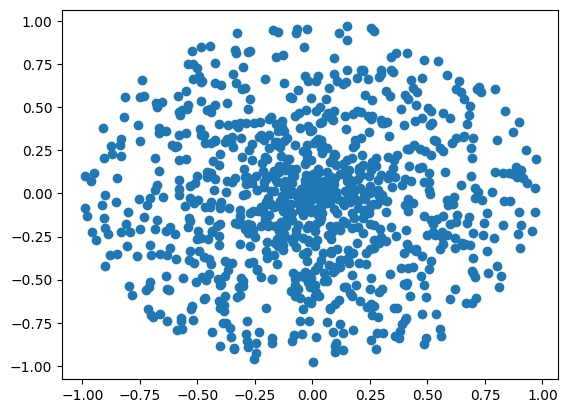

In [114]:
# точки, генерируемые функцией 1
ds1 = []

for _ in range(1000):
  ds1.append(generate1())

ds1 = np.array(ds1)
plt.scatter(ds1[:,0], ds1[:,1])
print(np.std(ds1))

(array([ 32.,  44., 104., 116., 190., 221., 119.,  87.,  56.,  31.]),
 array([-0.99067972, -0.79462125, -0.59856279, -0.40250432, -0.20644585,
        -0.01038739,  0.18567108,  0.38172955,  0.57778801,  0.77384648,
         0.96990495]),
 <BarContainer object of 10 artists>)

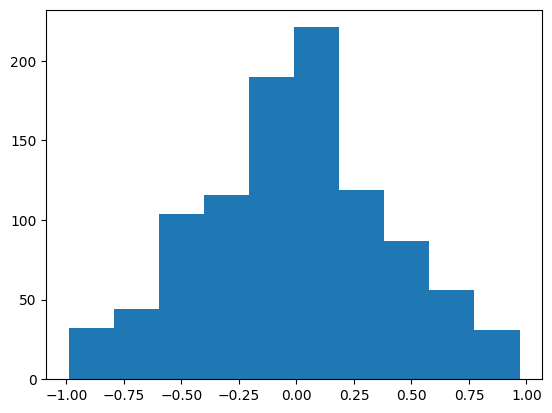

In [115]:
plt.hist(ds1[:,0])

(array([ 37.,  62.,  91., 127., 203., 204., 112.,  84.,  54.,  26.]),
 array([-0.98060097, -0.7857013 , -0.59080164, -0.39590198, -0.20100231,
        -0.00610265,  0.18879701,  0.38369668,  0.57859634,  0.773496  ,
         0.96839567]),
 <BarContainer object of 10 artists>)

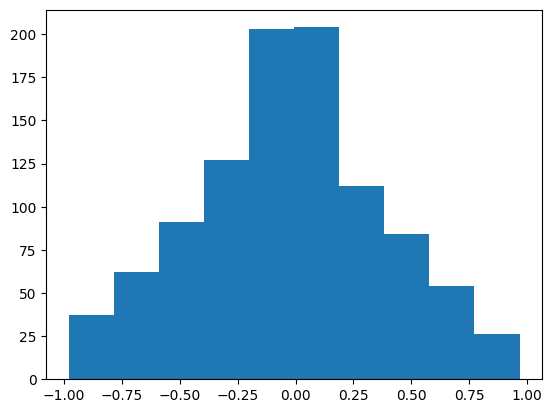

In [116]:
plt.hist(ds1[:,1])

0.4990798311804233


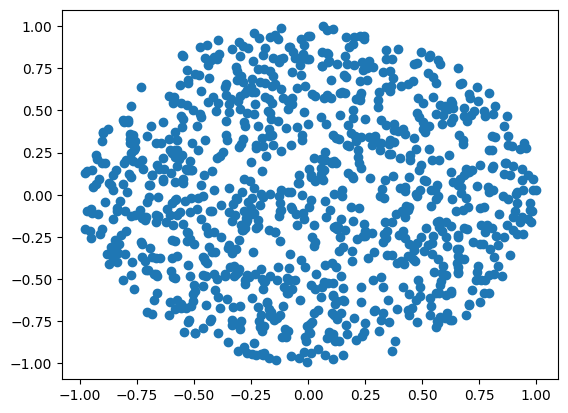

In [118]:
# точки, генерируемые функцией 2

ds2 = []

for _ in range(1000):
  ds2.append(generate2())

ds2 = np.array(ds2)
plt.scatter(ds2[:,0], ds2[:,1])
print(np.std(ds2))

(array([ 53.,  83., 107., 120., 129., 124., 109., 119., 102.,  54.]),
 array([-0.99113627, -0.79412209, -0.59710791, -0.40009374, -0.20307956,
        -0.00606539,  0.19094879,  0.38796297,  0.58497714,  0.78199132,
         0.97900549]),
 <BarContainer object of 10 artists>)

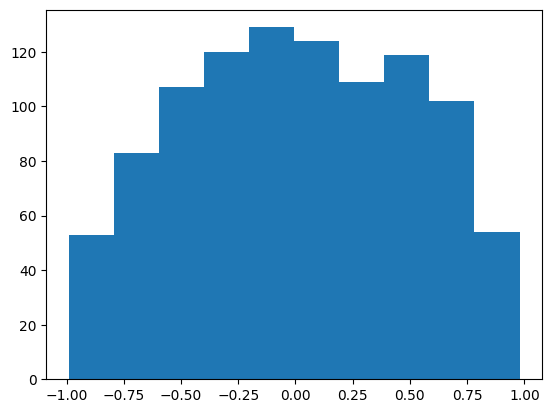

In [47]:
plt.hist(ds2[:,0])

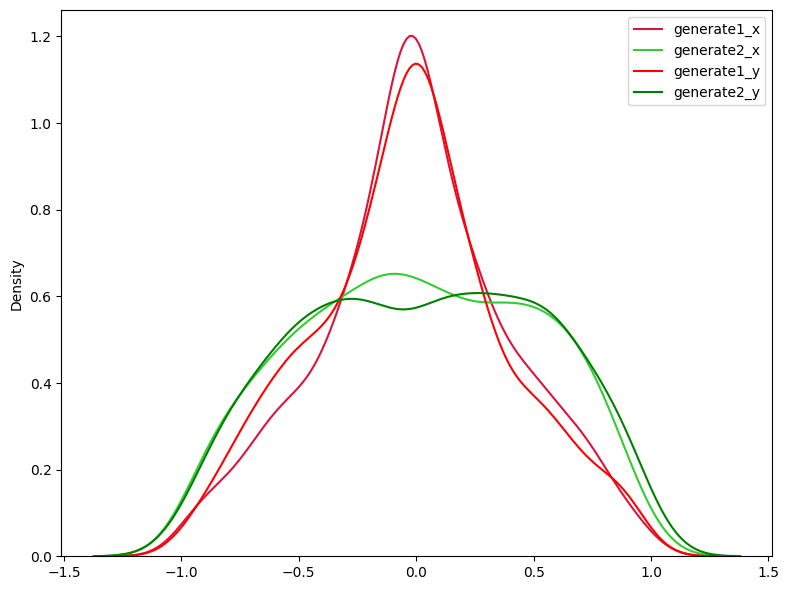

In [72]:
# сравнение распределений

import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=ds1[:,0],
            color='crimson', label='generate1_x', fill=False, ax=ax)
sns.kdeplot(data=ds2[:,0],
            color='limegreen', label='generate2_x', fill=False, ax=ax)
sns.kdeplot(data=ds1[:,1],
            color='red', label='generate1_y', fill=False, ax=ax)
sns.kdeplot(data=ds2[:,1],
            color='green', label='generate2_y', fill=False, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

## Код, чтобы проверить принадлежность отдельной точки (1d) к распределению

In [117]:
from scipy.stats import norm

# Define the point and distribution parameters
x = generate1()[0]
mean_x = np.mean(ds1[:,0])
std_x = np.std(ds1[:,0])

# Calculate the probability density
density = norm.pdf(x, loc=mean_x, scale=std_x)

print(f"The probability density at x={x} is: {density}")

The probability density at x=0.02599720538318813 is: 0.9826494334788073


## Код, чтобы проверить принадлежность отдельной точки (2d) к распределению

In [99]:
dist1 = stats.multivariate_normal(
    mean=[0,0],
    cov=np.cov(ds1.T)
)
dist2 = stats.multivariate_normal(
    mean=[0,0],
    cov=np.cov(ds2.T)
)

test_point=generate2()

prob1 = dist1.pdf(test_point)
prob2 = dist2.pdf(test_point)


log_ratio = np.log(prob2) - np.log(prob1)

print("Probability Density Analysis:")
print("-" * 50)
print(f"Test point: ({test_point[0]}, {test_point[1]})")
print(f"Probability density in Distribution 1: {prob1:.6f}")
print(f"Probability density in Distribution 2: {prob2:.6f}")
print(f"Log-likelihood ratio: {log_ratio:.6f}")

Probability Density Analysis:
--------------------------------------------------
Test point: (-0.2736598313790932, 0.9580451613441121)
Probability density in Distribution 1: 0.050007
Probability density in Distribution 2: 0.092873
Log-likelihood ratio: 0.619063


In [92]:
# Create a grid of points for plotting
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
points = np.column_stack((X.ravel(), Y.ravel()))

# Calculate probability densities for all points
Z1 = dist1.pdf(points).reshape(X.shape)
Z2 = dist2.pdf(points).reshape(X.shape)

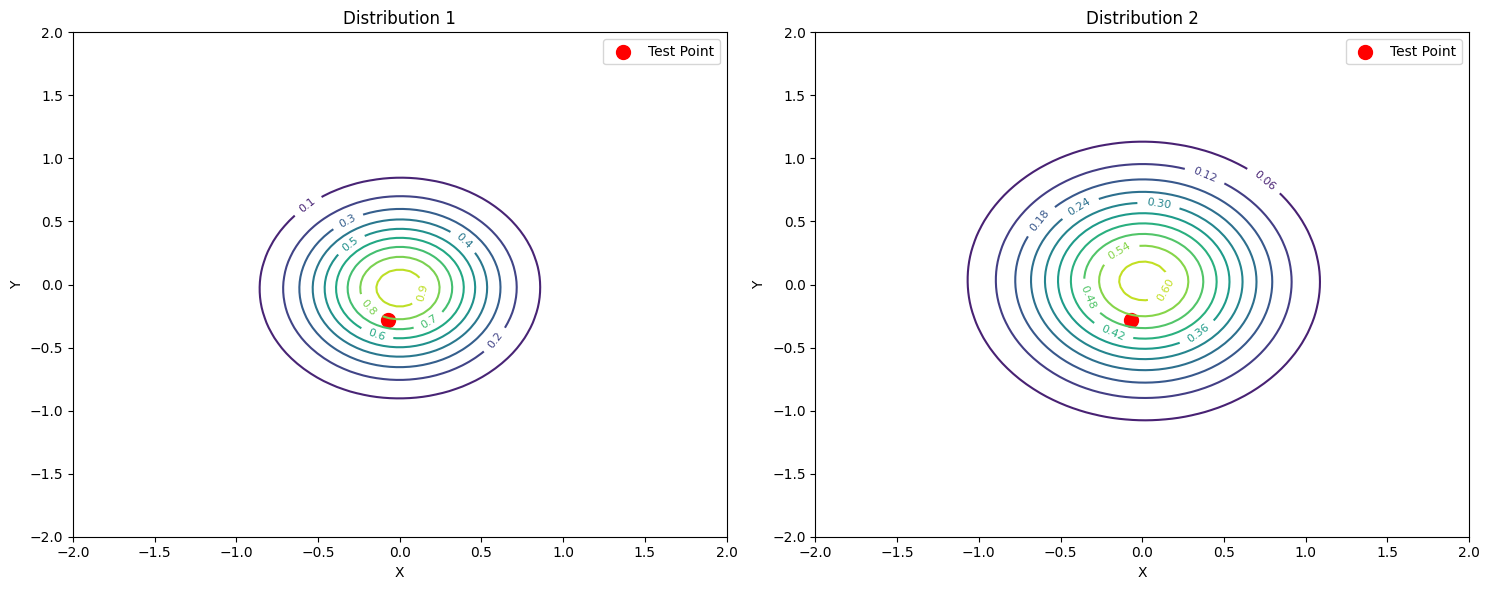

In [93]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot first distribution
contour1 = ax1.contour(X, Y, Z1, levels=10)
ax1.clabel(contour1, inline=True, fontsize=8)
ax1.scatter(test_point[0], test_point[1], color='red', s=100, label='Test Point')
ax1.set_title('Distribution 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# Plot second distribution
contour2 = ax2.contour(X, Y, Z2, levels=10)
ax2.clabel(contour2, inline=True, fontsize=8)
ax2.scatter(test_point[0], test_point[1], color='red', s=100, label='Test Point')
ax2.set_title('Distribution 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()

plt.tight_layout()
plt.show()